# 回归
## 线性回归
### 1. 获取数据，定义问题

数据的下载地址在这： http://archive.ics.uci.edu/ml/machine-learning-databases/00294/

里面是一个循环发电场的数据，共有9568个样本数据，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)。我们不用纠结于每项具体的意思。

我们的问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即:

$$PE = \theta_0 + \theta_1*AT + \theta_2*V + \theta_3*AP + \theta_4*RH$$

而需要学习的，就是$$\theta_0, \theta_1, \theta_2, \theta_3, \theta_4$$这5个参数。



### 2. 用pandas来读取数据
先把要导入的库声明了：

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

接着我们就可以用pandas读取数据了：

In [17]:
plt.rcParams['font.sans-serif'] = ['SF Mono']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率

In [18]:
data = pd.read_csv('../data/ccpp.csv')

测试下读取数据是否成功：

_读取前五行数据，如果是最后五行，用data.tail()_

In [19]:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### 3. 准备运行算法的数据
我们看看数据的维度：

结果是(9568, 5)。说明我们有9568个样本，每个样本有5列。

现在我们开始准备样本特征X，我们用AT， V，AP和RH这4个列作为样本特征。

In [20]:
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


接着我们准备样本输出y， 我们用PE作为样本输出。

In [21]:
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### 4. 划分训练集和测试集
我们把X和y的样本组合划分成两部分，一部分是训练集，一部分是测试集，代码如下：

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

查看下训练集和测试集的维度：

In [23]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


### 5. 运行scikit-learn的线性模型
终于到了临门一脚了，我们可以用scikit-learn的线性模型来拟合我们的问题了。scikit-learn的线性回归算法使用的是最小二乘法来实现的。代码如下：

In [24]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

拟合完毕后，我们看看我们的需要的模型系数结果：

In [25]:
print (linreg.intercept_)
print (linreg.coef_)

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


这样我们就得到了在步骤1里面需要求得的5个值。也就是说PE和其他4个变量的关系如下：

$$PE = 447.06297099 - 1.97376045*AT - 0.23229086*V + 0.0693515*AP -0.15806957*RH$$

### 6. 模型评价

我们需要评估我们的模型的好坏程度，对于线性回归来说，我们一般用均方差（Mean Squared Error, MSE）或者均方根差(Root Mean Squared Error, RMSE)在测试集上的表现来评价模型的好坏。

我们看看我们的模型的均方误差(MSE)和均方根误差(RMSE)，代码如下：

In [26]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.080401202073904
RMSE: 4.481116066570236


得到了MSE或者RMSE，如果我们用其他方法得到了不同的系数，需要选择模型时，就用MSE小的时候对应的参数。

比如这次我们用AT， V，AP这3个列作为样本特征。不要RH， 输出仍然是PE。代码如下：

In [27]:
X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print( "MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print( "RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 23.208907470136236
RMSE: 4.817562399194871


可以看出，去掉RH后，模型拟合的没有加上RH的好，MSE变大了。

### 7. 交叉验证
我们可以通过交叉验证来持续优化模型，代码如下，我们采用10折交叉验证，即cross_val_predict中的cv参数为10：

In [28]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 20.7955974619431
RMSE: 4.560219014690314


可以看出，采用交叉验证模型的MSE比第6节的大，主要原因是我们这里是对所有折的样本做测试集对应的预测值的MSE，而第6节仅仅对25%的测试集做了MSE。两者的先决条件并不同。

### 8. 画图观察结果

这里画图真实值和预测值的变化关系，离中间的直线y=x直接越近的点代表预测损失越低。代码如下：

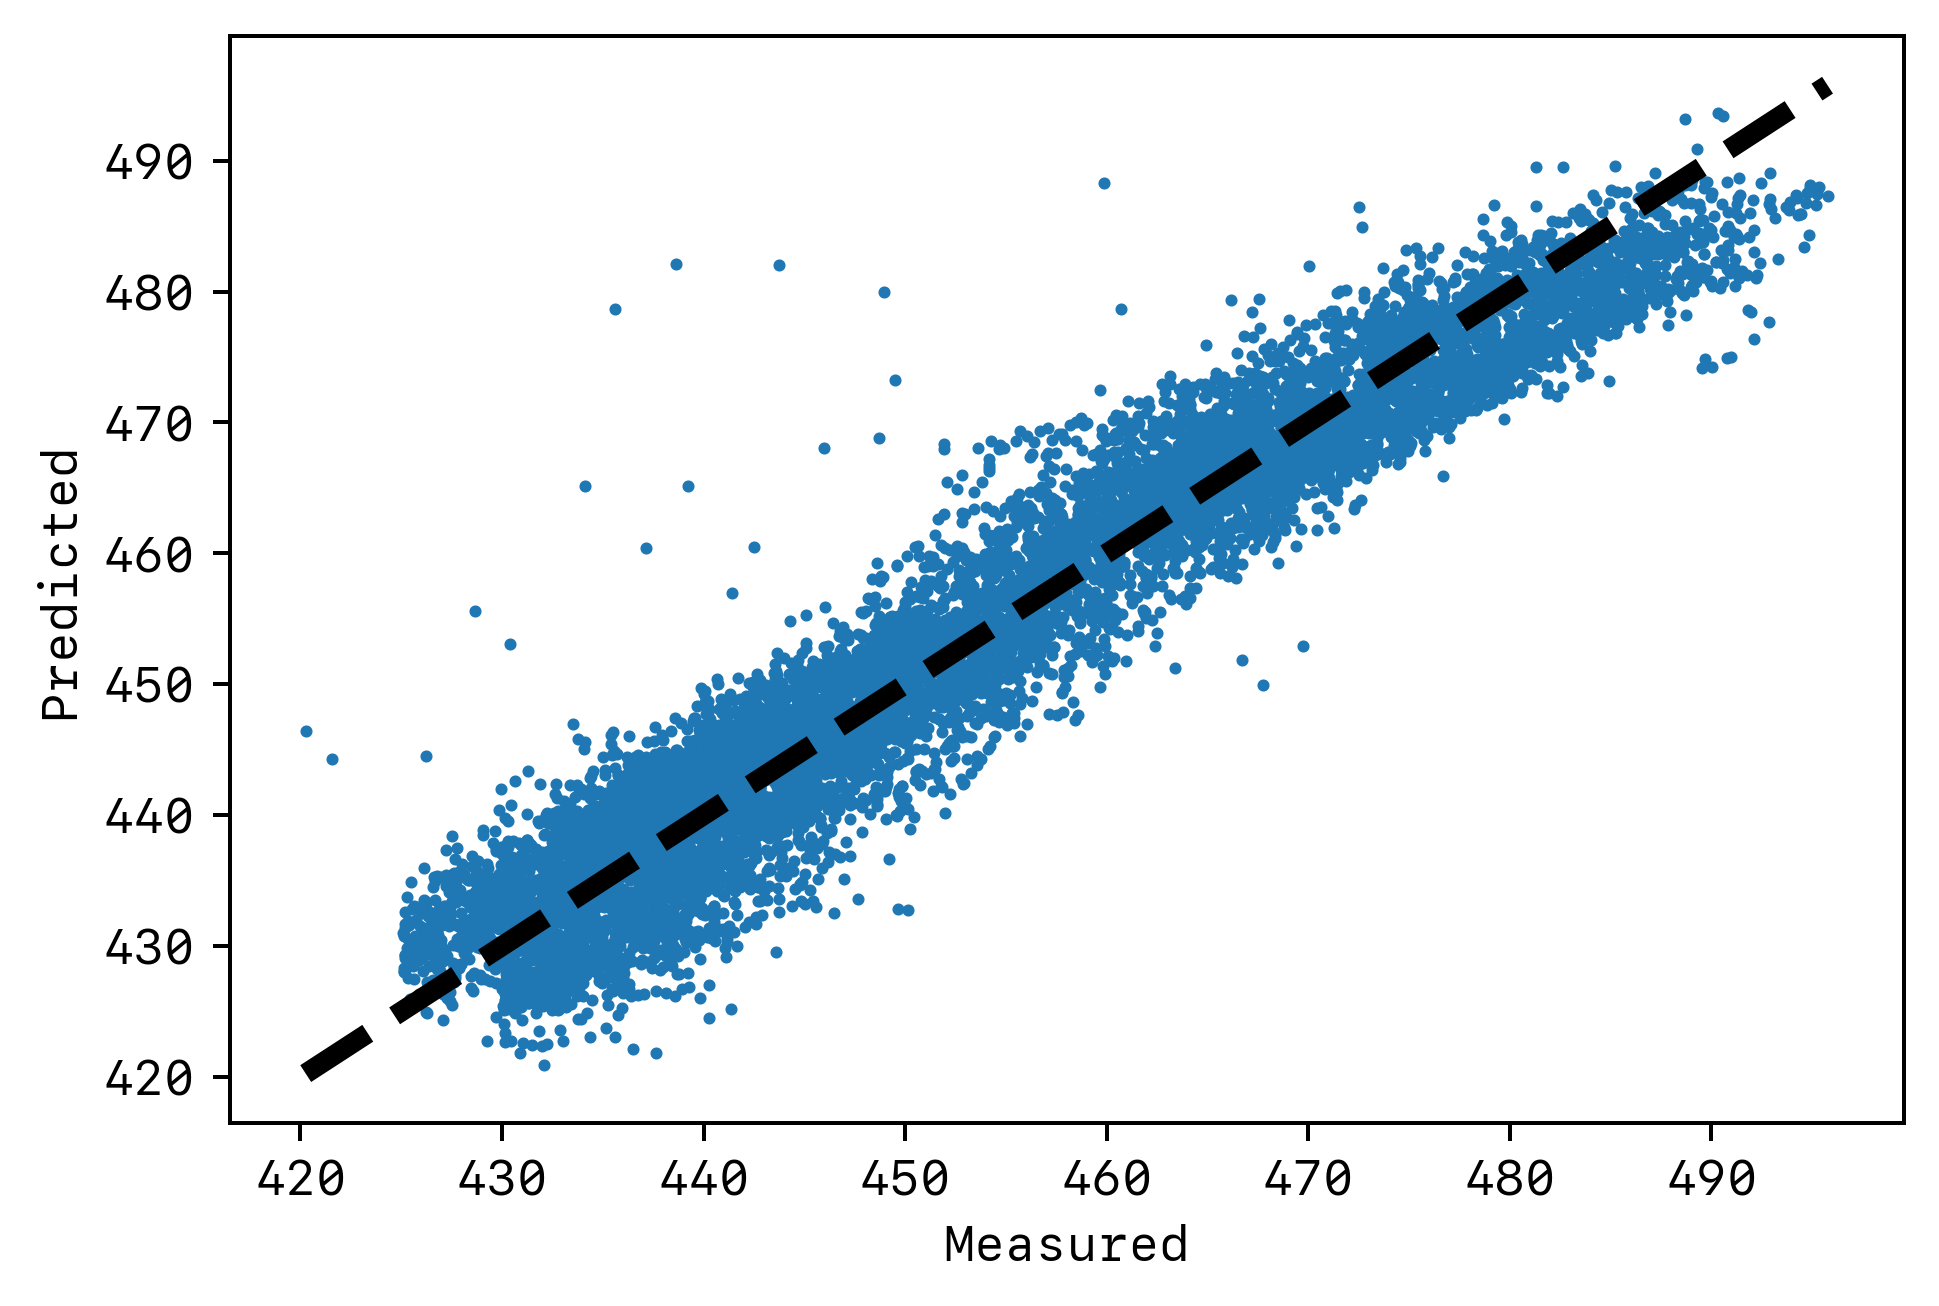

In [29]:
fig, ax = plt.subplots()
ax.scatter(y, predicted,s=2)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## 逻辑回归

鸢尾花有三个亚属，分别是山鸢尾（Iris-setosa）、变色鸢尾（Irisversicolor）和维吉尼亚鸢尾（Iris-virginica）。该数据集一共包含4个特 征变量，1个类别变量。共有150个样本，iris是鸢尾植物，这里存储了其萼片 和花瓣的长宽，共4个属性，鸢尾植物分三类。

/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


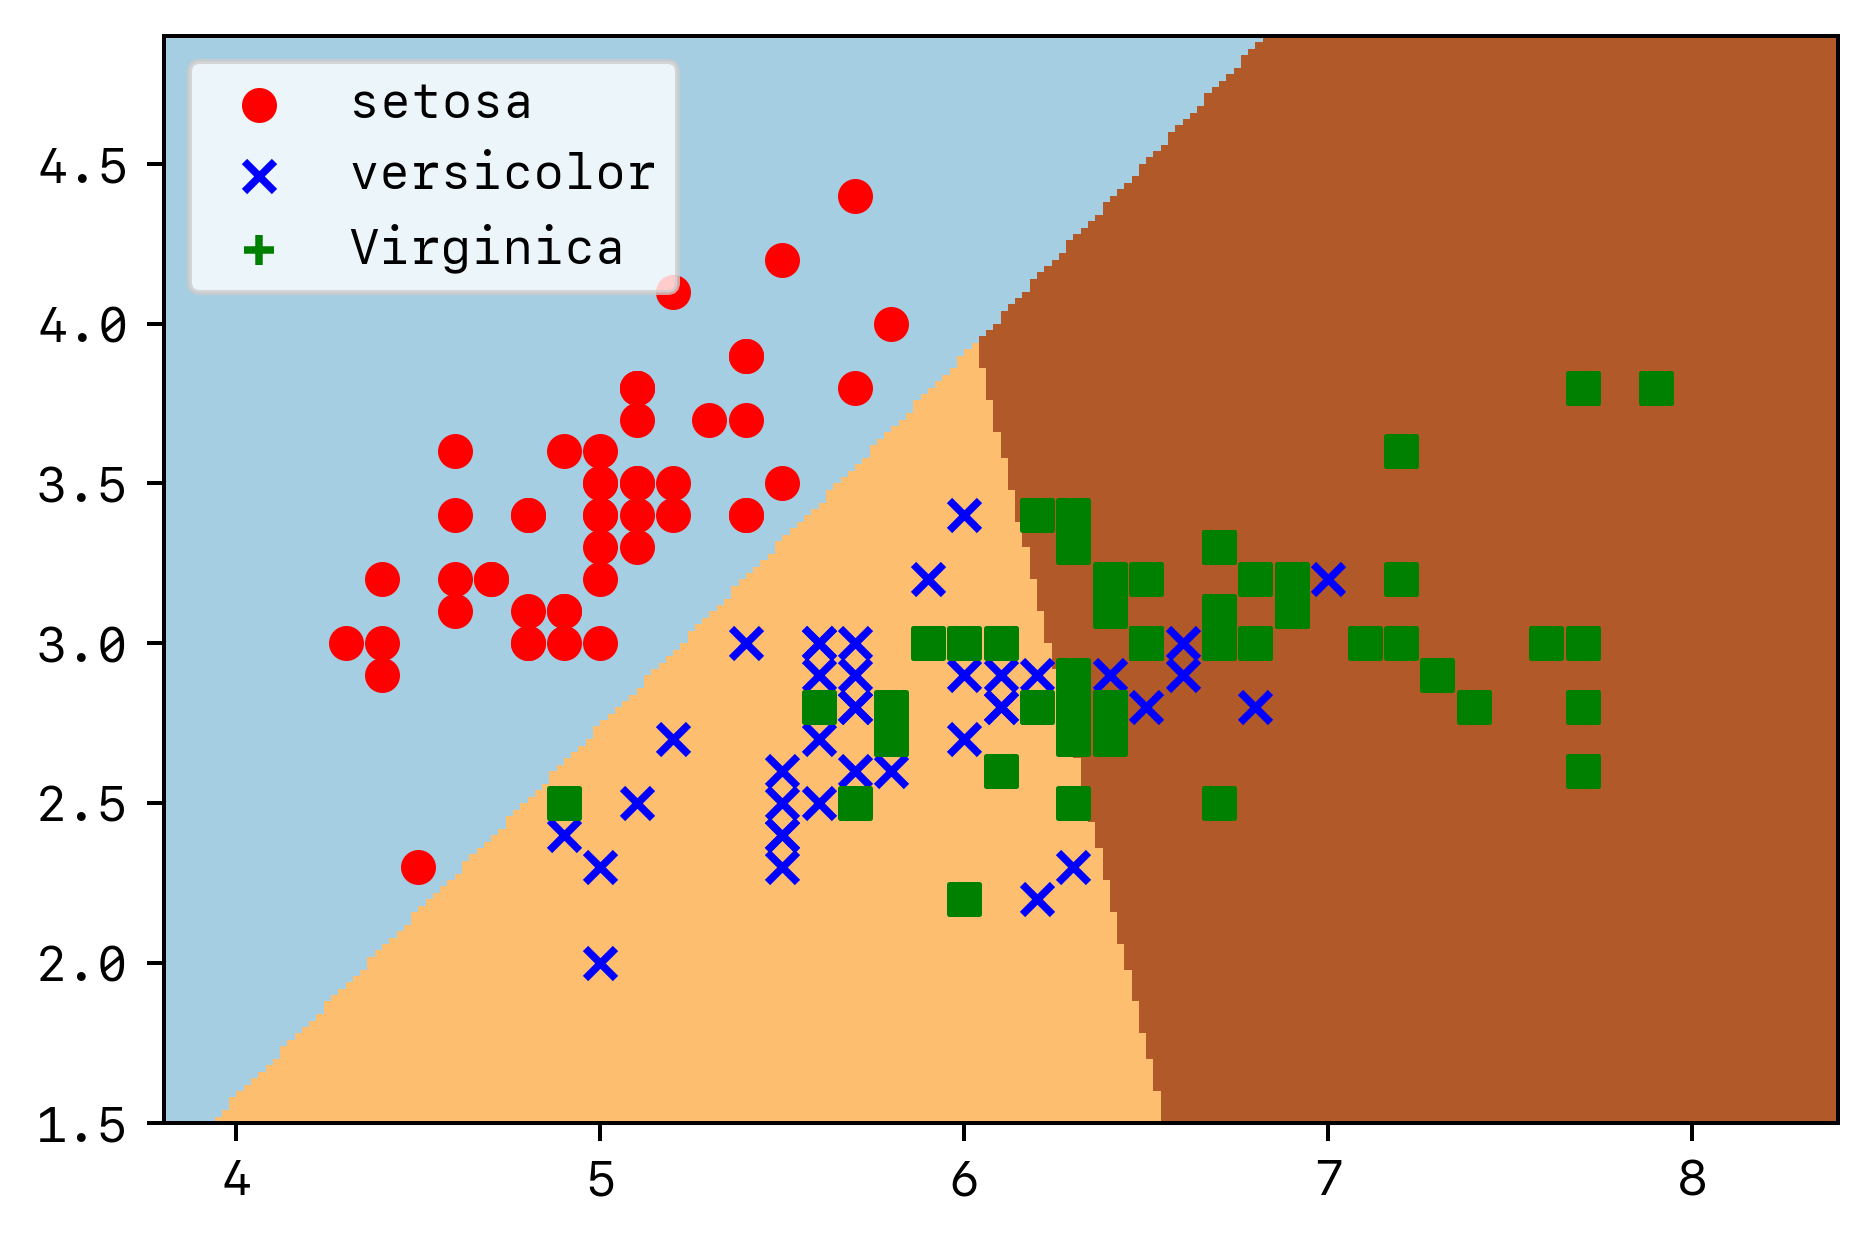

In [34]:
iris = datasets.load_iris() #获取花卉两列数据集
DD = iris.data
X = [x[0] for x in DD]
Y = [x[1] for x in DD]
plt.scatter(X[:50], Y[:50], color='red', marker='o', label='setosa')
plt.scatter(X[50:100], Y[50:100], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:], Y[100:],color='green', marker='+', label='Virginica')
plt.legend(loc=2) #左上角 plt.show()

X = iris.data[:, :2] #获取花卉两列数据集
Y = iris.target
lr = linear_model.LogisticRegression(C=1e5)
lr.fit(X,Y) #meshgrid函数生成两个网格矩阵
h = .02
x_min, x_max = X[:, 0].min()-.5, X[:, 0].max()+.5
y_min, y_max = X[:, 1].min()-.5, X[:, 1].max()+.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:50,0], X[:50,1], color='red',marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:,0], X[100:,1], color='green', marker='s', label='Virginica')
